In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as na


In [8]:
df = pd.read_csv('Final.csv')

In [9]:
df.shape

(18126, 34)

In [10]:
df.isnull().sum()

name                0
pdf_size            0
metadata_size       0
pages               0
xref_length         0
title_characters    0
isEncrypted         0
embedded_files      0
images              0
contains_text       0
header              0
obj                 0
endobj              0
stream              0
endstream           0
xref                0
trailer             0
startxref           0
pageno              0
encrypt             0
ObjStm              0
JS                  0
Javascript          0
AA                  0
OpenAction          0
Acroform            0
JBIG2Decode         0
RichMedia           0
launch              0
EmbeddedFile        0
XFA                 0
URI                 0
Colors              0
class               0
dtype: int64

In [11]:
# Rename 'Diagnosis' column to 'Label'
df['Label'] = df['class']
df = df.drop(columns=['class'])

# Print data types of columns
print(df.dtypes)


name                 object
pdf_size            float64
metadata_size       float64
pages               float64
xref_length         float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
images              float64
contains_text        object
header               object
obj                 float64
endobj              float64
stream              float64
endstream           float64
xref                float64
trailer             float64
startxref           float64
pageno              float64
encrypt             float64
ObjStm              float64
JS                  float64
Javascript          float64
AA                  float64
OpenAction          float64
Acroform            float64
JBIG2Decode         float64
RichMedia           float64
launch              float64
EmbeddedFile        float64
XFA                 float64
URI                 float64
Colors              float64
Label                object
dtype: object


<Axes: xlabel='Label', ylabel='count'>

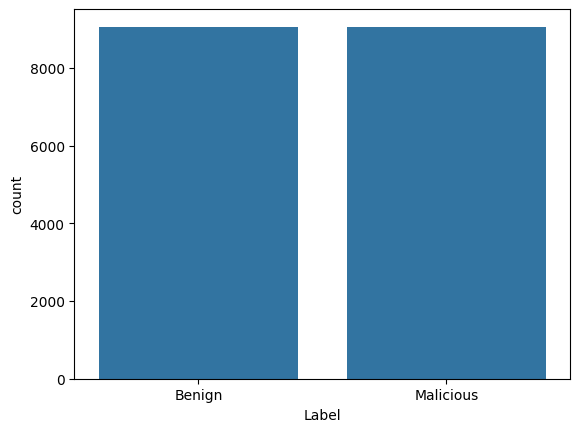

In [12]:
#Understand the data
sns.countplot(x="Label", data=df)

In [13]:
# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(df["Label"].values)
df['contains_text']= labelencoder.fit_transform(df["contains_text"])
df["header"] = labelencoder.fit_transform(df["header"])
df["name"] = labelencoder.fit_transform(df["name"])

In [14]:
df.dtypes


name                  int64
pdf_size            float64
metadata_size       float64
pages               float64
xref_length         float64
title_characters    float64
isEncrypted         float64
embedded_files      float64
images              float64
contains_text         int64
header                int64
obj                 float64
endobj              float64
stream              float64
endstream           float64
xref                float64
trailer             float64
startxref           float64
pageno              float64
encrypt             float64
ObjStm              float64
JS                  float64
Javascript          float64
AA                  float64
OpenAction          float64
Acroform            float64
JBIG2Decode         float64
RichMedia           float64
launch              float64
EmbeddedFile        float64
XFA                 float64
URI                 float64
Colors              float64
Label                object
dtype: object

In [15]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label"], axis=1)
print(X.describe().T) #Needs scaling

                    count         mean           std    min      25%     50%  \
name              18126.0  9062.500000   5232.669825    0.0  4531.25  9062.5   
pdf_size          18126.0    64.396557    197.068774    0.0     9.00    20.0   
metadata_size     18126.0   305.833554   1047.491822  180.0   180.00   262.0   
pages             18126.0     3.659384      8.164796    0.0     1.00     1.0   
xref_length       18126.0  3005.269282  18186.688574    3.0    10.00    21.0   
title_characters  18126.0    32.689617    843.323473    0.0     0.00     0.0   
isEncrypted       18126.0     0.004414      0.066290    0.0     0.00     0.0   
embedded_files    18126.0     0.014344      0.145227    0.0     0.00     0.0   
images            18126.0    -0.953492      0.210588   -1.0    -1.00    -1.0   
contains_text     18126.0     0.415646      0.492847    0.0     0.00     0.0   
header            18126.0     4.925246      1.713262    0.0     4.00     4.0   
obj               18126.0    51.892309  

In [16]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[2.64165517e-01 2.60254597e-03 3.07366824e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.20524138e-01 4.24328147e-03 1.83621739e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.08386207e-01 9.61810467e-04 2.35514839e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [7.73958621e-01 1.13154173e-04 8.38273157e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.10206897e-02 1.13154173e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.76413793e-02 1.13154173e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [17]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (13594, 33)
Shape of testing data is:  (4532, 33)


In [18]:
def models(X_train,y_train):

  #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

 #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)


  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[2]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[3]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    print('[5]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))


    return log, knn,tree,gauss, forest,svc_lin
mdl = models(X_train,y_train)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

[0]Logistic Regression Training Accuracy: 0.9396792702662939
[1]K Nearest Neighbor Training Accuracy: 0.9874209209945565
[2]Decision Tree Classifier Training Accuracy: 1.0
[3]Gaussian Naive Bayes Training Accuracy: 0.903707518022657
[4]Random Forest Classifier Training Accuracy: 0.9997793144034133
[5]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9571869942621745


[[2126  130]
 [ 155 2121]]
Model[0] Testing Accuracy = "0.9371138570167696!"



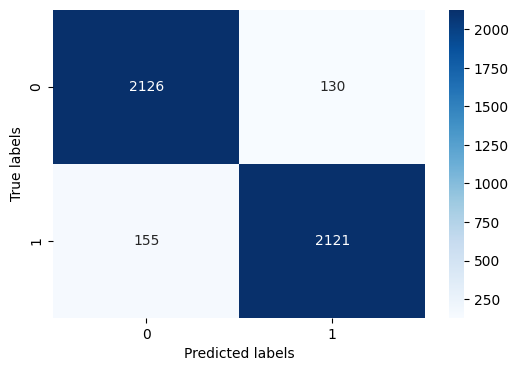

[[2239   17]
 [  61 2215]]
Model[1] Testing Accuracy = "0.9827890556045896!"



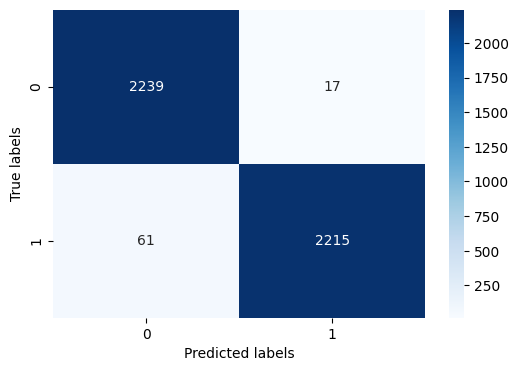

[[2246   10]
 [  14 2262]]
Model[2] Testing Accuracy = "0.9947043248014121!"



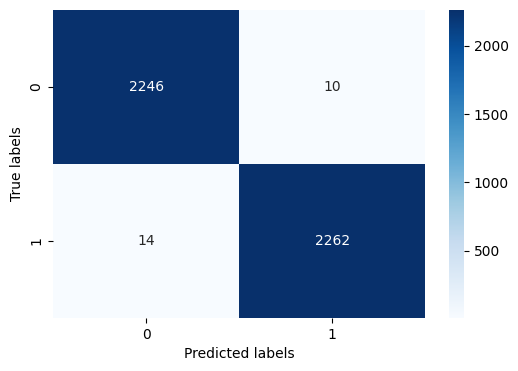

[[2249    7]
 [ 450 1826]]
Model[3] Testing Accuracy = "0.8991615180935569!"



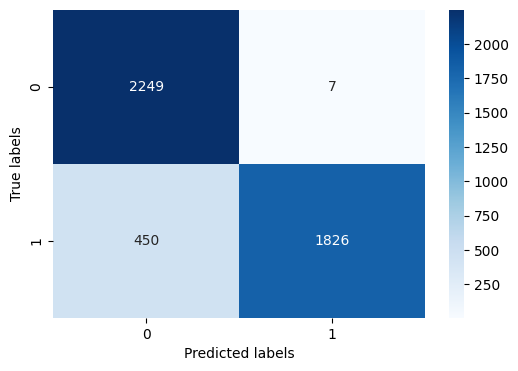

[[2252    4]
 [   8 2268]]
Model[4] Testing Accuracy = "0.9973521624007061!"



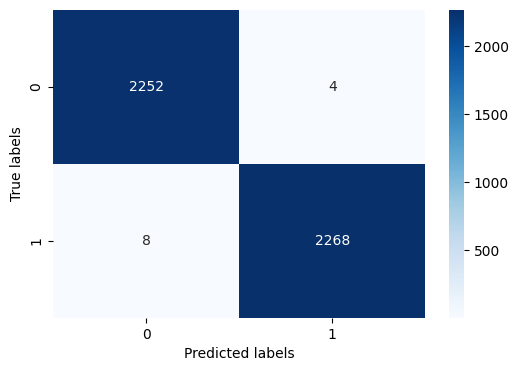

[[2179   77]
 [ 135 2141]]
Model[5] Testing Accuracy = "0.9532215357458076!"



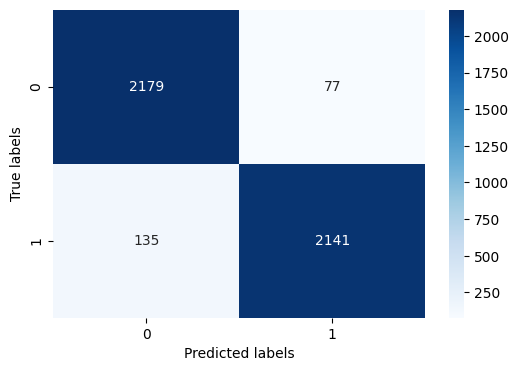

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Loop through each model
for i, mdl in enumerate(mdl):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, mdl.predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
    print()  # Print a new line

    # Plot the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [20]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [21]:
model = Sequential()
model.add(Dense(66, input_dim=33, activation='relu'))
model.add(Dense(14, input_dim=66, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 66)                2244      
                                                                 
 dense_4 (Dense)             (None, 14)                938       
                                                                 
 dropout_1 (Dropout)         (None, 14)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 15        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3197 (12.49 KB)
Trainable params: 3197 (12.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [22]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=40,
                    validation_data=(X_test, y_test))


Epoch 1/100
340/340 [==============================] - 6s 6ms/step - loss: 0.3392 - accuracy: 0.8665 - val_loss: 0.1601 - val_accuracy: 0.9389
Epoch 2/100
340/340 [==============================] - 2s 7ms/step - loss: 0.1554 - accuracy: 0.9476 - val_loss: 0.1130 - val_accuracy: 0.9607
Epoch 3/100
340/340 [==============================] - 1s 4ms/step - loss: 0.1222 - accuracy: 0.9626 - val_loss: 0.0955 - val_accuracy: 0.9695
Epoch 4/100
340/340 [==============================] - 2s 5ms/step - loss: 0.1098 - accuracy: 0.9693 - val_loss: 0.0862 - val_accuracy: 0.9731
Epoch 5/100
340/340 [==============================] - 2s 5ms/step - loss: 0.0990 - accuracy: 0.9738 - val_loss: 0.0826 - val_accuracy: 0.9810
Epoch 6/100
340/340 [==============================] - 1s 4ms/step - loss: 0.0899 - accuracy: 0.9775 - val_loss: 0.0737 - val_accuracy: 0.9804
Epoch 7/100
340/340 [==============================] - 1s 4ms/step - loss: 0.0838 - accuracy: 0.9784 - val_loss: 0.0686 - val_accuracy: 0.9815

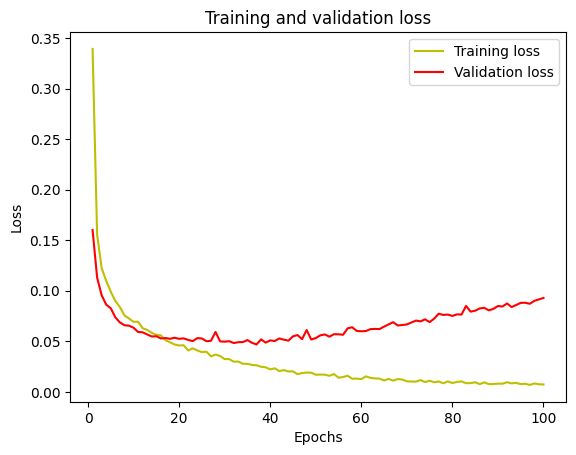

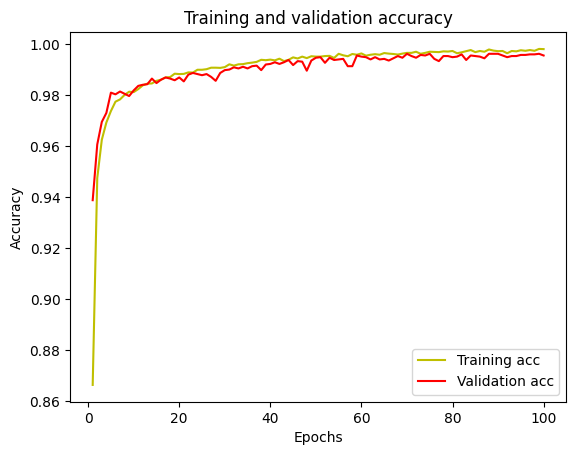

In [23]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

142/142 [==============================] - 0s 2ms/step


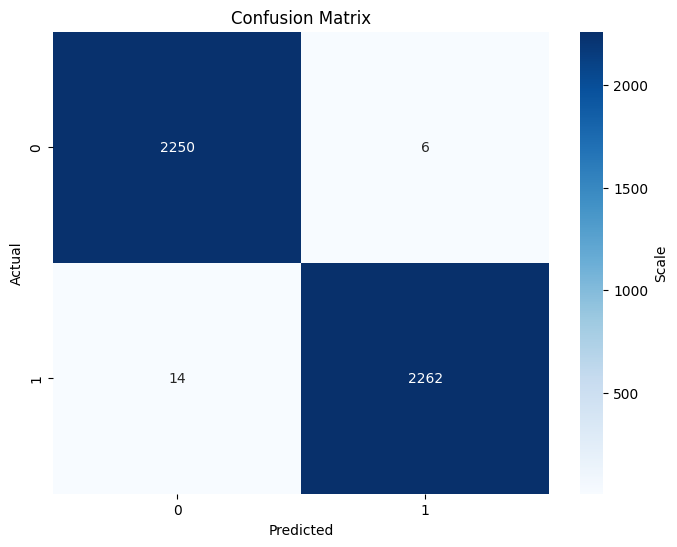

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Scale'})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


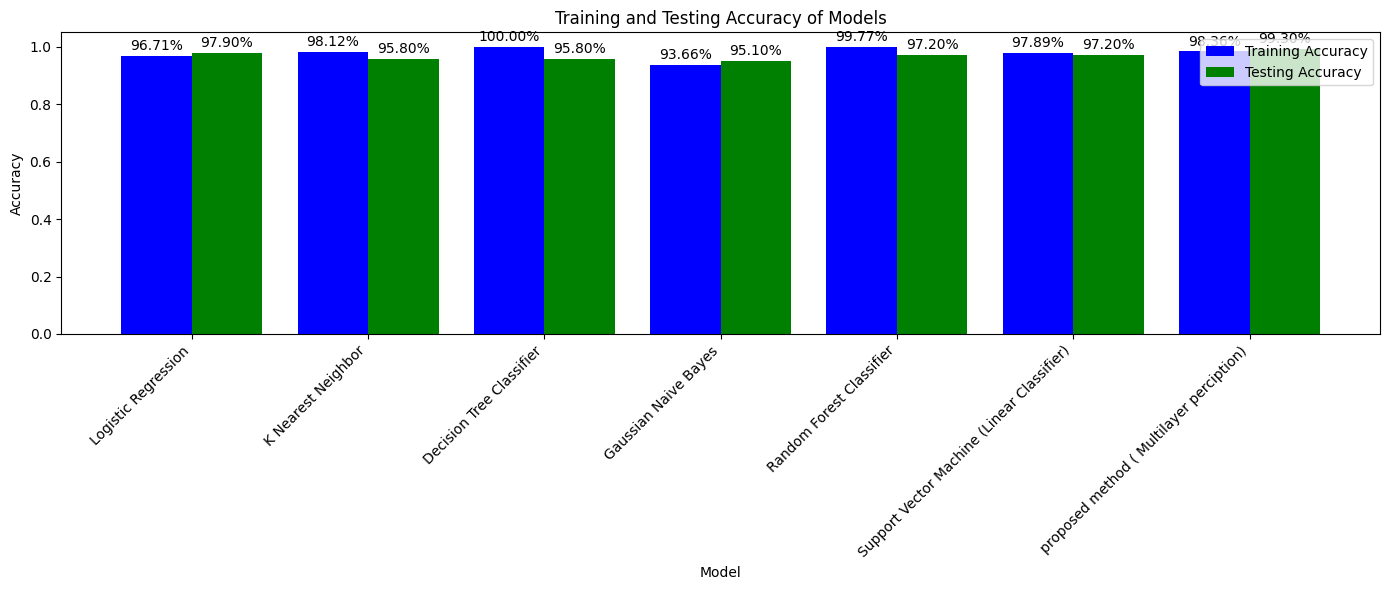

In [25]:
import matplotlib.pyplot as plt

# Training accuracies
train_accuracies = [0.9671361502347418, 0.9812206572769953, 1.0, 0.9366197183098591, 0.9976525821596244, 0.9788732394366197,0.9836 ]

# Testing accuracies
test_accuracies = [0.9790209790209791,0.958041958041958,0.958041958041958,0.951048951048951, 0.972027972027972,0.972027972027972,0.9930]  # Fill this list with your actual testing accuracies

# Model names
model_names = [
    'Logistic Regression',
    'K Nearest Neighbor',
    'Decision Tree Classifier',
    'Gaussian Naive Bayes',
    'Random Forest Classifier',
    'Support Vector Machine (Linear Classifier)',
    'proposed method ( Multilayer perciption)'
]

# Plotting
plt.figure(figsize=(14, 6))

# Plot training accuracy
bars_train = plt.bar([i - 0.2 for i in range(len(train_accuracies))], train_accuracies, width=0.4, color='blue', label='Training Accuracy')

# Plot testing accuracy
bars_test = plt.bar([i + 0.2 for i in range(len(test_accuracies))], test_accuracies, width=0.4, color='green', label='Testing Accuracy')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Models')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Adding accuracy rate on top of each bar
for bars, accuracies in zip([bars_train, bars_test], [train_accuracies, test_accuracies]):
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, '{:.2f}%'.format(acc * 100),
                 ha='center', va='bottom')

# Adding legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
